# Weather Data Analysis

This notebook performs **EDA, Data Transformation, and Feature Selection** on the Rainfall dataset.

## 1. Import Libraries & Load Dataset

In [6]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("Rainfall.csv")
df.head()


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


## 2. Exploratory Data Analysis (EDA)

Shape: (366, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB
None


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366,366.000000,365.000000,365.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,NaN,NaN,NaN
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,NaN,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,NaN,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,NaN,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,NaN,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,NaN,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,NaN,8.200000,190.000000,27.900000



Missing values:
day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64


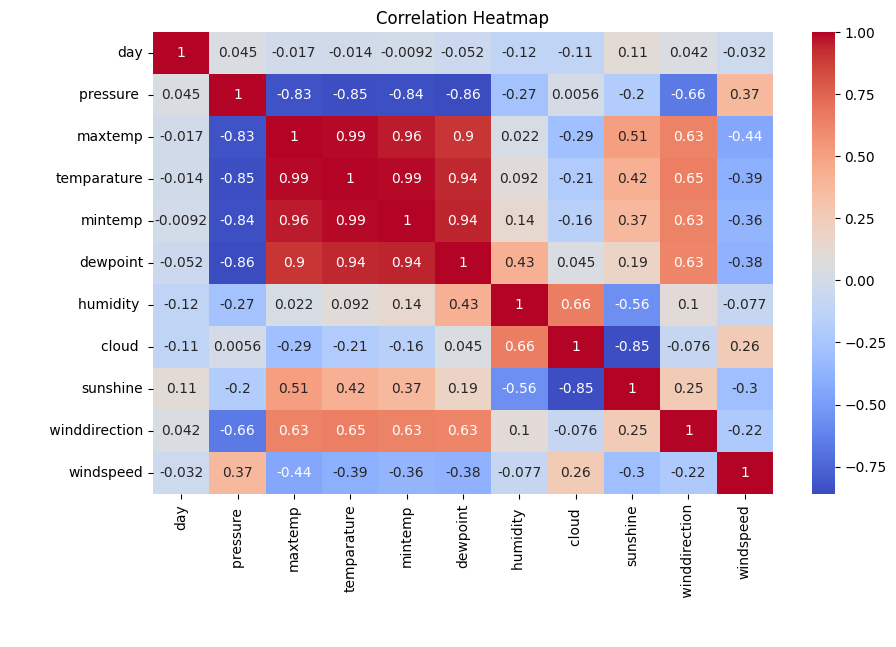

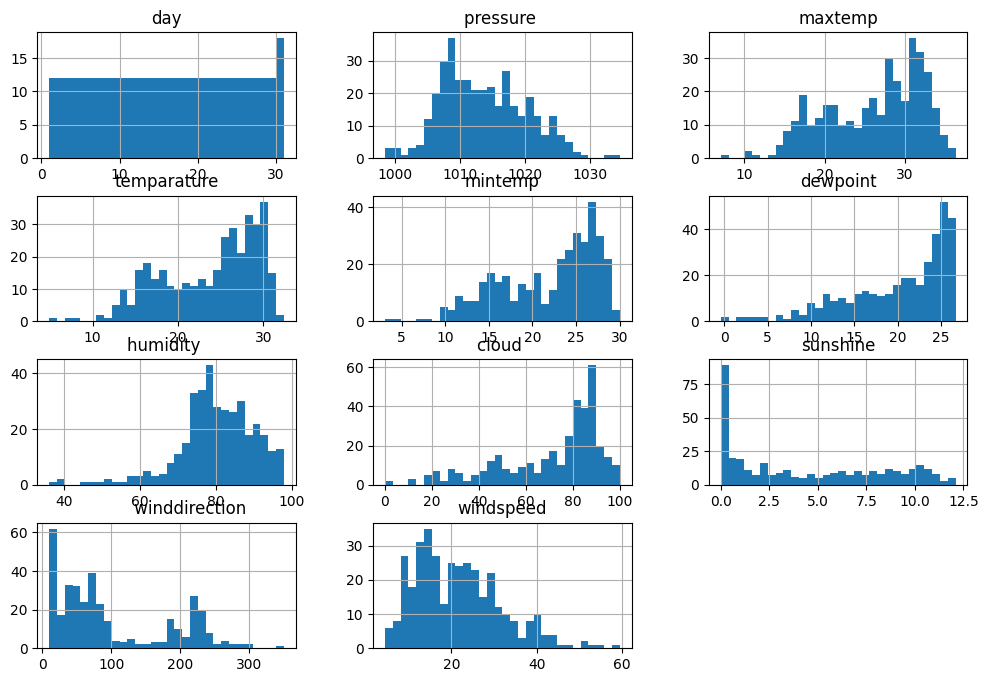

In [7]:

# Shape and info
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

# Summary statistics
display(df.describe(include='all'))

# Missing values
print("\nMissing values:")
print(df.isnull().sum())

# Correlation heatmap (numeric only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of numeric columns
df.hist(figsize=(12,8), bins=30)
plt.show()


## 3. Data Transformation

In [8]:

# Drop duplicates
df = df.drop_duplicates()

# Handle missing values (numeric = mean, categorical = mode)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Scale numeric features
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,-1.674718,1.897809,-1.053782,-0.968384,-0.911936,-1.150321,-0.813795,-1.016547,0.685478,1.242193,-0.263887,0.474302
1,-1.561231,1.289005,-0.752283,-0.861719,-0.840335,-0.732877,0.081842,0.545363,0.685478,-0.972100,-0.631985,-0.621080
2,-1.447743,0.929967,-0.986782,-0.790610,-0.697133,-0.265339,1.475055,0.912872,0.685478,-1.124810,-0.754684,-0.730618
3,-1.334255,0.805085,-0.651783,-0.559503,-0.500230,-0.198548,0.977479,0.775056,0.685478,-0.870293,-0.631985,-0.461752
4,-1.220768,0.336774,-0.819283,-0.541726,-0.303327,-0.014873,1.475055,0.453486,0.685478,-1.124810,-0.754684,-0.780408


## 4. Feature Selection

Detected task type: regression
Selected features (Univariate): ['pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint']

Feature Importance:
pressure                  0.172706
         winddirection    0.160626
maxtemp                   0.150628
cloud                     0.130650
sunshine                  0.080373
dewpoint                  0.076459
day                       0.073133
humidity                  0.072720
temparature               0.039132
mintemp                   0.038152
rainfall                  0.005422
dtype: float64


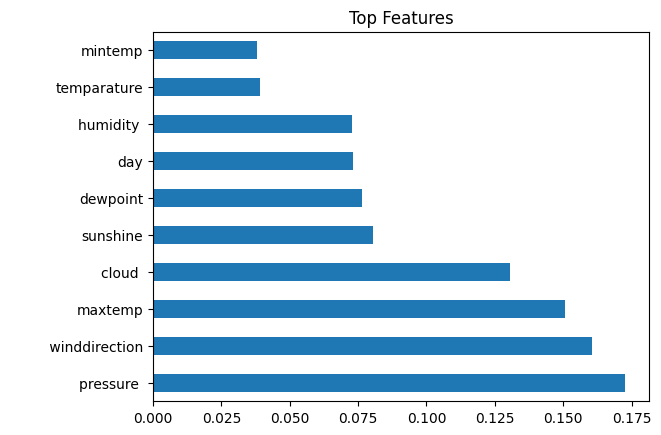

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Assume target is last column
target_col = df.columns[-1]
X = df.drop(target_col, axis=1)
y = df[target_col]

# ---- STEP 1: Handle target properly ----
if y.dtypes == 'object':  # categorical target
    y = LabelEncoder().fit_transform(y)
    task_type = "classification"
elif len(y.unique()) <= 20:  # few unique values -> classification
    task_type = "classification"
else:  # continuous values -> regression
    task_type = "regression"

print("Detected task type:", task_type)

# ---- STEP 2: Feature Selection ----
if task_type == "classification":
    best = SelectKBest(score_func=f_classif, k=min(5, X.shape[1]))
    X_new = best.fit_transform(X, y)
    selected_features = X.columns[best.get_support()]
    print("Selected features (Univariate):", list(selected_features))

    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)

else:  # regression
    best = SelectKBest(score_func=f_regression, k=min(5, X.shape[1]))
    X_new = best.fit_transform(X, y)
    selected_features = X.columns[best.get_support()]
    print("Selected features (Univariate):", list(selected_features))

    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

# ---- STEP 3: Feature Importance ----
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot
feature_importance.head(10).plot(kind='barh')
plt.title("Top Features")
plt.show()
